# Babak Penyisihan Data Compeititon Information System Festival 2025 - apa ya, hmmmm

In [139]:
# Basic Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display, HTML

# Modelling (Supervised)
from sklearn.ensemble import RandomForestRegressor
import catboost as cb
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Modelling (Unsupervised)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import geopandas as gpd
import requests
from shapely.geometry import Point

# Modelling (Sentiment Analysis)
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import collections
from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## I. Data Loading

In [11]:
df = pd.read_csv("public-transport.csv")
df.head(5)

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0        1.0     P00142  ...     106.84402             7  2023-04-03 05:21:44   
1        0.0    B01963P  ...     106.83302            13  2023-04-03 05:42:44   
2        0.0    B00499P  ...     106.81435            38  2023-04-03 05:59:06   
3        0.0    B05587P  ...     106.93526            23  2023-04-03 05:44:51   
4        0.0     P00239  ...     106.88900             5  2023-04-03 06:17:35   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0       P00253                Tegalan      -6.203101      106.85715   
1      B03307P    Sampoerna Strategic      -6.217152      106.81892   
2      B04962P  Simpang Kunir Kemukus      -6.133731      106.81475   
3      B03090P      Raya Penggilingan      -6.183068      106.93194   
4       P00098       Kali Besar Barat      -6.135355      106.81143   

   stopEndSeq           tapOutTime  payAmount  
0        12.0  2023-04-03 06:00:53     3500.0  
1        21.0  2023-04-03 06:40:01     3500.0  
2        39.0  2023-04-03 06:50:55     3500.0  
3        29.0  2023-04-03 06:28:16     3500.0  
4        15.0  2023-04-03 06:57:03     3500.0  

[5 rows x 22 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## II. Data Cleaning

##### A. Drop data duplikat

In [10]:
df.duplicated().sum()

0

Tidak ada proses handling duplicate values karena sudah tidak ada value yang duplikat pada data.

##### B. Drop Kolom Yang Tidak Diperlukan

Kolom ```transID```, ```payCardID```, dan ```payCardName``` di-drop karena kolom ini tidak membawa informasi yang berguna untuk proses analisis.

In [9]:
df.drop(columns = ["transID", "payCardID", "payCardName"], inplace = True)

##### C. Handling Anomaly and Missing Values

Untuk mendeteksi anomali pada data,  dilakukan pengecekan value pada masing-masing kolom.

In [13]:
for column in df.columns:
    print(f"=== {column} ===")
    print(df[column].value_counts())
    print()

=== transID ===
transID
EIIW227B8L34VB    1
MSKL239R1G99EH    1
JLEK935X6X28JK    1
ZEVS150D0B51EM    1
XROE560H5E26WL    1
                 ..
KBNR598P1S89AD    1
EYUY572L2V20BW    1
NLYQ687K1R15DE    1
WVQB228E3H44VP    1
FMZZ963S4B68ZP    1
Name: count, Length: 37900, dtype: int64

=== payCardID ===
payCardID
180062659848800     40
2273899076950287    40
3533955956389840    40
5250092671931114    40
4739532514157439    40
                    ..
5598479367629402     1
180046572914583      1
213198923840248      1
4306052879688        1
501862539795         1
Name: count, Length: 2000, dtype: int64

=== payCardBank ===
payCardBank
dki       18743
emoney     6866
brizzi     3531
flazz      3234
online     2869
bni        2657
Name: count, dtype: int64

=== payCardName ===
payCardName
Fathonah Saefullah    80
Suci Wacana           80
Suci Hutagalung       44
Cengkal Lestari       44
Rahayu Prabowo        44
                      ..
Uli Prasetyo           1
Drs. Agnes Gunarto     1
Kunca

Pengecekan pasangan nilai antara ```corridorID``` dengan ```corridorName``` untuk memastikan data konsisten.

In [14]:
duplicate_corridors = df.groupby("corridorID")["corridorName"].nunique()
duplicate_corridors[duplicate_corridors > 1].sort_values(ascending = False)

Series([], Name: corridorName, dtype: int64)

In [15]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Terdapat beberapa kolom yang terdapat missing values. Berikut merupakan teknik yang akan digunakan untuk handling missing value tersebut:
- ```corridorName```: mapping value berdasarkan ```corridorID```, begitu pula sebaliknya
- ```tapInStops```: mapping value berdasarkan ```tapInStopsName```, begitu pula sebaliknya
- ```tapOutStops```: mapping value berdasarkan ```tapOutStopsName```, begitu pula sebaliknya
- ```tapOutStopsLat``` dan ```tapOutStopsLon``` berdasarkan ```tapOutStops``` dan ```tapOutStopsName```, begitu pula sebaliknya
- ```payAmount```: mapping value berdasarkan ```corridorID```


Setelah itu, missing values lainnya akan didrop.

=> ```corridorName```

In [16]:
corridor_mapping = (
    df.dropna(subset = ["corridorID", "corridorName"])
        .drop_duplicates(subset = ["corridorID"])
        .set_index("corridorID")["corridorName"]
        .to_dict()
)

df["corridorName"] = df["corridorName"].fillna(df["corridorID"].map(corridor_mapping))

In [17]:
corridor_mapping = (
    df.dropna(subset = ["corridorID", "corridorName"])
        .drop_duplicates(subset = ["corridorName"])
        .set_index("corridorName")["corridorID"]
        .to_dict()
)

df["corridorID"] = df["corridorID"].fillna(df["corridorName"].map(corridor_mapping))

=> ```tapInStops```

In [18]:
stop_mapping = (
    df.dropna(subset = ["tapInStops", "tapInStopsName"])
        .drop_duplicates(subset = ["tapInStops"])
        .set_index("tapInStops")["tapInStopsName"]
        .to_dict()
)

df["tapInStops"] = df["tapInStops"].fillna(df["tapInStopsName"].map({v: k for k, v in stop_mapping.items()}))

In [19]:
stop_mapping = (
    df.dropna(subset = ["tapInStopsName", "tapInStops"])
        .drop_duplicates(subset = ["tapInStopsName"])
        .set_index("tapInStopsName")["tapInStops"]
        .to_dict()
)

df["tapInStopsName"] = df["tapInStopsName"].fillna(df["tapInStops"].map({v: k for k, v in stop_mapping.items()}))

=> ```tapOutStops```

In [20]:
stop_mapping = (
    df.dropna(subset = ["tapOutStops", "tapOutStopsName"])
        .drop_duplicates(subset = ["tapOutStops"])
        .set_index("tapOutStops")["tapOutStopsName"]
        .to_dict()
)

df["tapOutStops"] = df["tapOutStops"].fillna(df["tapOutStopsName"].map({v: k for k, v in stop_mapping.items()}))

In [21]:
stop_mapping = (
    df.dropna(subset = ["tapOutStops", "tapOutStopsName"])
        .drop_duplicates(subset = ["tapOutStopsName"])
        .set_index("tapOutStopsName")["tapOutStops"]
        .to_dict()
)

df["tapOutStopsName"] = df["tapOutStopsName"].fillna(df["tapOutStops"].map({v: k for k, v in stop_mapping.items()}))

=> ```tapOutStopsLat```

In [22]:
stop_mapping = (
    df.dropna(subset = ["tapOutStops", "tapOutStopsLat"])
        .drop_duplicates(subset = ["tapOutStopsLat"])
        .set_index("tapOutStopsLat")["tapOutStops"]
        .to_dict()
)

df["tapOutStopsLat"] = df["tapOutStopsLat"].fillna(df["tapOutStops"].map({v: k for k, v in stop_mapping.items()}))

In [23]:
stop_mapping = (
    df.dropna(subset = ["tapOutStops", "tapOutStopsLat"])
        .drop_duplicates(subset = ["tapOutStops"])
        .set_index("tapOutStops")["tapOutStopsLat"]
        .to_dict()
)

df["tapOutStops"] = df["tapOutStops"].fillna(df["tapOutStopsLat"].map({v: k for k, v in stop_mapping.items()}))

=> ```tapOutStopsLon```

In [24]:
stop_mapping = (
    df.dropna(subset = ["tapOutStops", "tapOutStopsLon"])
        .drop_duplicates(subset = ["tapOutStopsLon"])
        .set_index("tapOutStopsLon")["tapOutStops"]
        .to_dict()
)

df["tapOutStopsLon"] = df["tapOutStopsLon"].fillna(df["tapOutStops"].map({v: k for k, v in stop_mapping.items()}))

In [25]:
stop_mapping = (
    df.dropna(subset = ["tapOutStops", "tapOutStopsLon"])
        .drop_duplicates(subset = ["tapOutStopsLon"])
        .set_index("tapOutStopsLon")["tapOutStops"]
        .to_dict()
)

df["tapOutStops"] = df["tapOutStops"].fillna(df["tapOutStopsLon"].map({v: k for k, v in stop_mapping.items()}))

=> ```payAmount```

In [26]:
df["payAmount"].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

In [27]:
royal_trans = df[df["payAmount"] == 20000.0]["corridorID"].unique()
royal_trans

array(['1T', 'B14', 'T21', 'D32', 'S31', nan, 'B13', 'D31', '1K', '6P',
       'S12'], dtype=object)

In [28]:
jaklingo = df.loc[df["corridorID"].astype(str).str.startswith("JAK."), "corridorID"].unique()
jaklingo

array(['JAK.18', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', 'JAK.15',
       'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06', 'JAK.14',
       'JAK.71', 'JAK.77', 'JAK.44', 'JAK.48B', 'JAK.19', 'JAK.75',
       'JAK.52', 'JAK.37', 'JAK.31', 'JAK.43C', 'JAK.117', 'JAK.49',
       'JAK.20', 'JAK.118', 'JAK.27', 'JAK.13', 'JAK.84', 'JAK.08',
       'JAK.23', 'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21', 'JAK.26',
       'JAK.64', 'JAK.47', 'JAK.01', 'JAK.120', 'JAK.85', 'JAK.10',
       'JAK.41', 'JAK.86', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29',
       'JAK.48A', 'JAK.45', 'JAK.110A', 'JAK.51', 'JAK.54', 'JAK.03',
       'JAK.25', 'JAK.39', 'JAK.80', 'JAK.11', 'JAK.17', 'JAK.30',
       'JAK.58', 'JAK.34', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60',
       'JAK.56', 'JAK.59', 'JAK.113', 'JAK.04', 'JAK.61', 'JAK.24',
       'JAK.35', 'JAK.38', 'JAK.33', 'JAK.05', 'JAK.106', 'JAK.28',
       'JAK.53', 'JAK.99', 'JAK.12'], dtype=object)

In [29]:
df.loc[df["payAmount"].isna() & df["corridorID"].isin(jaklingo), "payAmount"] = 0
df.loc[df["payAmount"].isna() & df["corridorID"].isin(royal_trans), "payAmount"] = 20000
df.loc[df["payAmount"].isna(), "payAmount"] = 3500

In [30]:
df.dropna(inplace = True)

In [31]:
df.count()

transID             35428
payCardID           35428
payCardBank         35428
payCardName         35428
payCardSex          35428
payCardBirthDate    35428
corridorID          35428
corridorName        35428
direction           35428
tapInStops          35428
tapInStopsName      35428
tapInStopsLat       35428
tapInStopsLon       35428
stopStartSeq        35428
tapInTime           35428
tapOutStops         35428
tapOutStopsName     35428
tapOutStopsLat      35428
tapOutStopsLon      35428
stopEndSeq          35428
tapOutTime          35428
payAmount           35428
dtype: int64

Setelah preprocessing, ukuran data berkurang dari 37900 menjadi 35428 baris.

## III. Feature Engineering

Menambahkan kolom ```type``` untuk mempermudah proses analisis dengan value sebagai berikut:
- BRT
- Non-BRT
- RoyalTrans
- Jaklingo

In [32]:
royal_trans = df[df["payAmount"] == 20000.0]["corridorID"].unique()
royal_trans

array(['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12'],
      dtype=object)

In [33]:
jaklingo = df.loc[df["corridorID"].astype(str).str.startswith("JAK."), "corridorID"].unique()
jaklingo

array(['JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', 'JAK.15', 'JAK.112',
       'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06', 'JAK.14', 'JAK.71',
       'JAK.77', 'JAK.44', 'JAK.48B', 'JAK.19', 'JAK.75', 'JAK.52',
       'JAK.37', 'JAK.31', 'JAK.43C', 'JAK.117', 'JAK.49', 'JAK.20',
       'JAK.118', 'JAK.27', 'JAK.13', 'JAK.84', 'JAK.08', 'JAK.23',
       'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64',
       'JAK.47', 'JAK.01', 'JAK.120', 'JAK.85', 'JAK.10', 'JAK.41',
       'JAK.86', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.48A',
       'JAK.45', 'JAK.18', 'JAK.51', 'JAK.54', 'JAK.110A', 'JAK.03',
       'JAK.25', 'JAK.39', 'JAK.80', 'JAK.11', 'JAK.17', 'JAK.30',
       'JAK.58', 'JAK.34', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60',
       'JAK.56', 'JAK.59', 'JAK.113', 'JAK.04', 'JAK.61', 'JAK.24',
       'JAK.35', 'JAK.38', 'JAK.33', 'JAK.05', 'JAK.106', 'JAK.28',
       'JAK.53', 'JAK.99', 'JAK.12'], dtype=object)

In [34]:
brt = df.loc[
    df["corridorID"].astype(str).str.isdigit() |
    df["corridorID"].astype(str).str.startswith("M"),
    "corridorID"
].unique()

brt

array(['5', '12', 'M7B', '4', '13', 'M9', '11', 'M1', '14', '2', 'M11',
       'M7', '1', 'M8', 'M3', 'M10', 'M2', 'M4', 'M12', '10', 'M1H', '3',
       'M6', '8', 'M13', '7', '6', '9', 'M5'], dtype=object)

In [35]:
non_brt = df.loc[~df["corridorID"].isin(set(jaklingo) | set(royal_trans) | set(brt)), "corridorID"].unique()
non_brt

array(['6C', 'R1A', '11D', '1Q', '5M', '9A', 'S22', '9E', 'T11', '6V',
       '11Q', '1C', '3B', '7E', '1P', '7D', '6H', 'BW9', 'JIS3', '6N',
       '9N', '7P', '13B', '12A', '9D', '3A', '3C', 'B21', '8K', '10D',
       'B11', '11M', '2F', '8C', '12B', '5D', '3H', '7A', '7Q', '1M',
       '5C', '6Q', '4E', '2H', '8E', '6M', 'L13E', '12P', '1F', '12C',
       '13C', '4B', '7C', '11N', '2E', '2A', '8A', '1E', '9F', '9H',
       '13D', '5N', '6T', '11P', '5F', '2P', 'S21', '1N', '6U', '2B',
       '10K', '6A', '4F', '6B', '5B', '11K', '10B', '3F', 'S11', '6D',
       '1H', '4C', '8D', '4D', '10A', '9C', 'D21', 'D11', '8M', '1B',
       '7F', '12F', '10H', '11C', '3E', '12H', '1A', '11B', '2Q', '1R',
       '7B'], dtype=object)

In [36]:
df["type"] = df["corridorID"].apply(lambda x: "RoyalTrans" if x in royal_trans else ("Jaklingo" if x in jaklingo else ("BRT" if x in brt else "Non-BRT")))

In [38]:
df.to_csv("procesed_data.csv", index=False)

## IV. Exploratory Data Analysis

In [209]:
df = pd.read_csv("procesed_data.csv")
df.head(5)

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... stopStartSeq            tapInTime  tapOutStops  \
0        1.0     P00142  ...            7  2023-04-03 05:21:44       P00253   
1        0.0    B01963P  ...           13  2023-04-03 05:42:44      B03307P   
2        0.0    B00499P  ...           38  2023-04-03 05:59:06      B04962P   
3        0.0    B05587P  ...           23  2023-04-03 05:44:51      B03090P   
4        0.0     P00239  ...            5  2023-04-03 06:17:35       P00098   

         tapOutStopsName tapOutStopsLat tapOutStopsLon stopEndSeq  \
0                Tegalan      -6.203101      106.85715       12.0   
1    Sampoerna Strategic      -6.217152      106.81892       21.0   
2  Simpang Kunir Kemukus      -6.133731      106.81475       39.0   
3      Raya Penggilingan      -6.183068      106.93194       29.0   
4       Kali Besar Barat      -6.135355      106.81143       15.0   

            tapOutTime  payAmount     type  
0  2023-04-03 06:00:53     3500.0      BRT  
1  2023-04-03 06:40:01     3500.0  Non-BRT  
2  2023-04-03 06:50:55     3500.0  Non-BRT  
3  2023-04-03 06:28:16     3500.0  Non-BRT  
4  2023-04-03 06:57:03     3500.0      BRT  

[5 rows x 23 columns]

In [41]:
def barplot_handler(df, x, y, x_label, y_label, title, show_top_n = None):
    if show_top_n is not None:
        df = df.nlargest(show_top_n, x)

    sns.barplot(
        data = df,
        x = x,
        y = y,
        hue = y,
        legend = False,
        orient = "h",
        palette = ["#60a5fa" if i == 0 else "#dbeafe" for i in range(df[df.columns[0]].count())]
    )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

In [42]:
def lineplot_handler(df, x, y, x_label, y_label, title):
    sns.lineplot(
        data = df,
        x = x,
        y = y,
        marker = "o",
        color = "#60a5fa"
    )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.show()

##### A. Analisis Karakteristik Pelanggan

1. Metode Pembayaran

In [43]:
overall_groupby_paycard = df["payCardBank"].value_counts().reset_index()
overall_groupby_paycard

payCardBank  count
0         dki  17505
1      emoney   6439
2      brizzi   3285
3       flazz   3013
4      online   2683
5         bni   2503

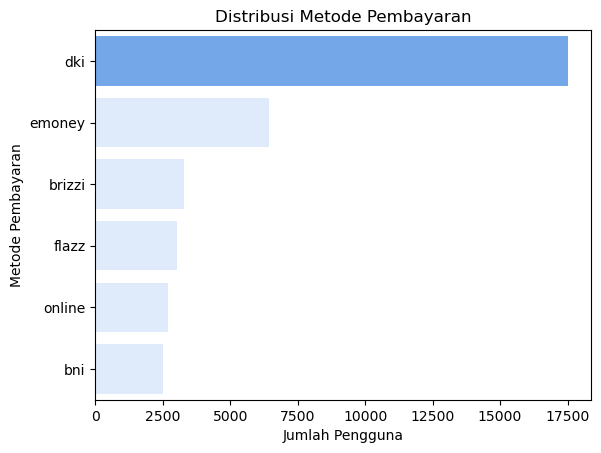

In [44]:
barplot_handler(
    overall_groupby_paycard,
    x = "count",
    y = "payCardBank",
    x_label = "Jumlah Pengguna",
    y_label = "Metode Pembayaran",
    title = "Distribusi Metode Pembayaran"
)

2. Gender

In [45]:
overall_groupby_gender = df["payCardSex"].value_counts().reset_index()
overall_groupby_gender

payCardSex  count
0          F  18848
1          M  16580

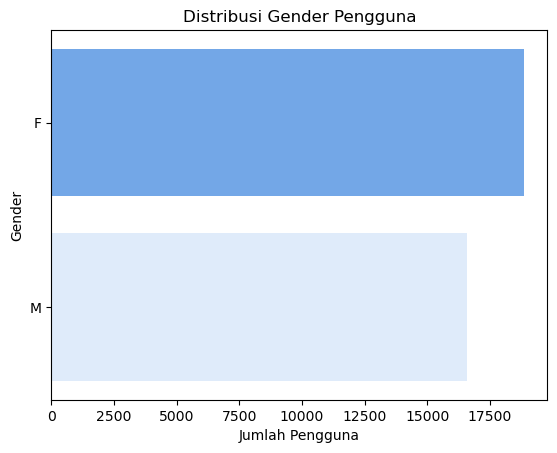

In [46]:
barplot_handler(
    overall_groupby_gender,
    x = "count",
    y = "payCardSex",
    x_label = "Jumlah Pengguna",
    y_label = "Gender",
    title = "Distribusi Gender Pengguna"
)

3. Tahun Kelahiran

In [47]:
overall_groupby_birthyear = df["payCardBirthDate"].value_counts().reset_index()
overall_groupby_birthyear

payCardBirthDate  count
0               1992   1312
1               1981   1298
2               1994   1265
3               1987   1219
4               1985   1178
..               ...    ...
61              1963      9
62              1949      8
63              1955      5
64              1958      4
65              1954      3

[66 rows x 2 columns]

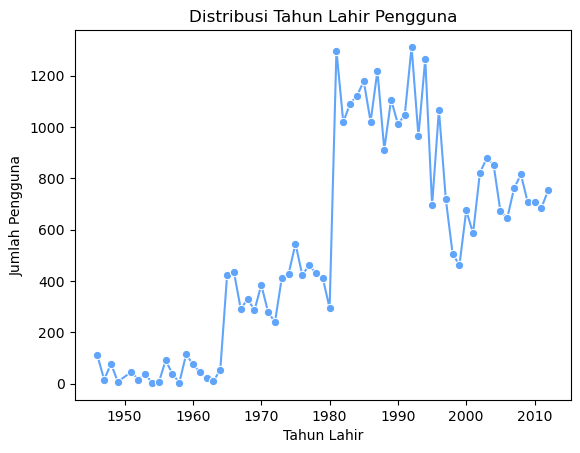

In [48]:
lineplot_handler(
    overall_groupby_birthyear,
    x = "payCardBirthDate",
    y = "count",
    x_label = "Tahun Lahir",
    y_label = "Jumlah Pengguna",
    title = "Distribusi Tahun Lahir Pengguna"
)

##### B. Analisis Tingkat Kepadatan Rute

1. Jumlah Penumpang Berdasarkan Jenis Transportasi

In [49]:
passenger_groupby_type = df["type"].value_counts().reset_index()
passenger_groupby_type

type  count
0     Non-BRT  16194
1    Jaklingo  12969
2         BRT   4619
3  RoyalTrans   1646

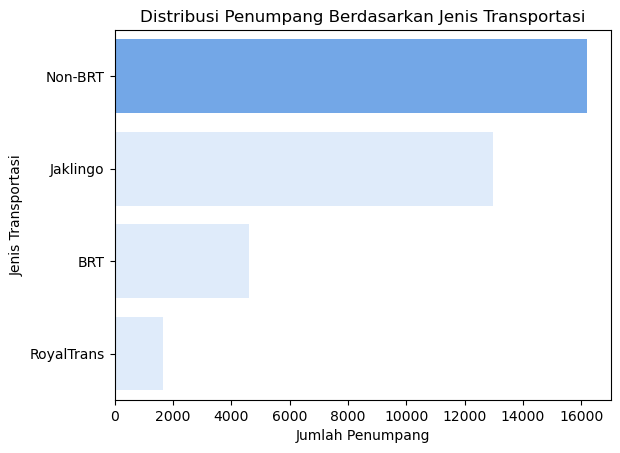

In [50]:
barplot_handler(
    passenger_groupby_type,
    x = "count",
    y = "type",
    x_label = "Jumlah Penumpang",
    y_label = "Jenis Transportasi",
    title = "Distribusi Penumpang Berdasarkan Jenis Transportasi",
)

2. Jumlah Penumpang Berdasarkan Koridor

In [51]:
df["corridorLabel"] = df["corridorID"].astype(str) + " - " + df["corridorName"]

In [52]:
passenger_groupby_corridor = df["corridorLabel"].value_counts().reset_index()
passenger_groupby_corridor

corridorLabel  count
0                            1T - Cibubur - Balai Kota    384
1                                  S21 - Ciputat - CSW    376
2       JIS3 - Harmoni - Jakarta International Stadium    333
3              JAK.06 - Kampung Rambutan - Pondok Gede    327
4    11P - Rusun Pondok Bambu - Walikota Jakarta Timur    323
..                                                 ...    ...
216                           1R - Senen - Tanah Abang     38
217               JAK.99 - Term. Pulo Gadung - Lampiri     30
218  JAK.12 - Tanah Abang - Kebayoran Lama via Pos ...     22
219                     7B - Kampung Rambutan - Blok M     17
220                         M5 - Matraman Baru - Ancol     15

[221 rows x 2 columns]

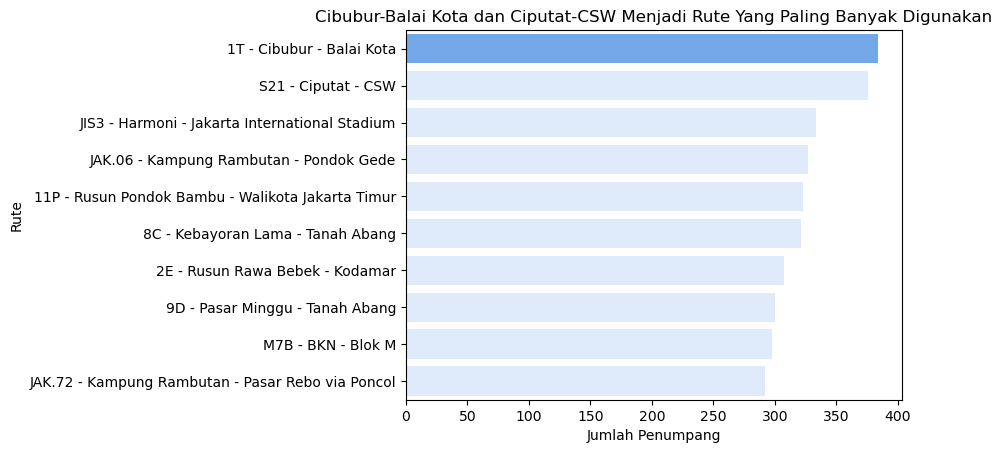

In [53]:
barplot_handler(
    passenger_groupby_corridor,
    x = "count",
    y = "corridorLabel",
    x_label = "Jumlah Penumpang",
    y_label = "Rute",
    title = "Cibubur-Balai Kota dan Ciputat-CSW Menjadi Rute Yang Paling Banyak Digunakan",
    show_top_n = 10
)

3. Jumlah Tap-In dan Tap-Out Berdasarkan Waktu

In [54]:
df["tapInHour"] = pd.to_datetime(df["tapInTime"]).dt.hour
df["tapOutHour"] = pd.to_datetime(df["tapOutTime"]).dt.hour

In [55]:
df["tapInWeekday"] = pd.to_datetime(df["tapInTime"]).dt.weekday
df["tapOutWeekday"] = pd.to_datetime(df["tapOutTime"]).dt.weekday

In [56]:
df["tapInMonth"] = pd.to_datetime(df["tapInTime"]).dt.month
df["tapOutMonth"] = pd.to_datetime(df["tapOutTime"]).dt.month

In [57]:
tapin_groupby_hour = df["tapInHour"].value_counts().reset_index()
tapin_groupby_hour

tapInHour  count
0           6   5450
1          17   5150
2          16   3138
3           5   3132
4           8   2708
5           9   2634
6           7   2606
7          19   2295
8          18   2261
9          20   2258
10         21   2011
11         15    369
12         13    337
13         11    321
14         12    316
15         10    279
16         14    163

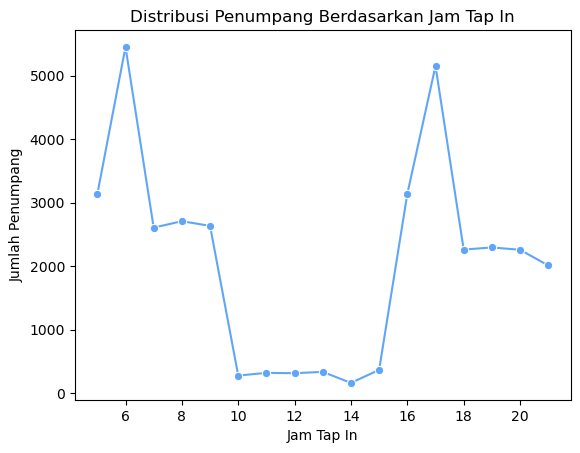

In [58]:
lineplot_handler(
    tapin_groupby_hour,
    x = "tapInHour",
    y = "count",
    x_label = "Jam Tap In",
    y_label = "Jumlah Penumpang",
    title = "Distribusi Penumpang Berdasarkan Jam Tap In"
)

In [59]:
tapin_groupby_day = df["tapInWeekday"].value_counts().reset_index()
tapin_groupby_day

tapInWeekday  count
0             4   6441
1             1   6403
2             0   6392
3             3   6390
4             2   6383
5             6   1719
6             5   1700

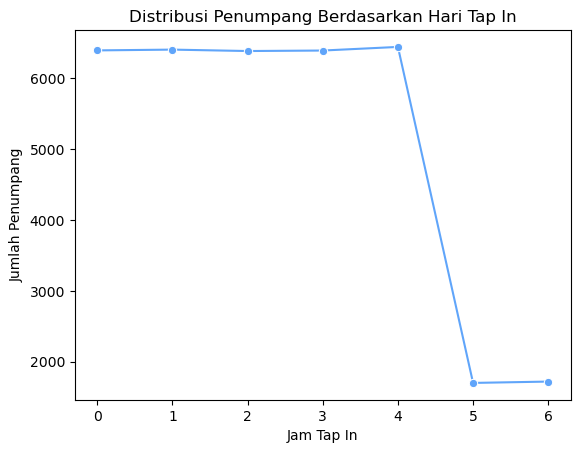

In [60]:
lineplot_handler(
    tapin_groupby_day,
    x = "tapInWeekday",
    y = "count",
    x_label = "Jam Tap In",
    y_label = "Jumlah Penumpang",
    title = "Distribusi Penumpang Berdasarkan Hari Tap In"
)

In [61]:
tapin_groupby_month = df["tapInMonth"].value_counts().reset_index()
tapin_groupby_month

tapInMonth  count
0           4  35428

In [62]:
tapout_groupby_hour = df["tapOutHour"].value_counts().reset_index()
tapout_groupby_hour

tapOutHour  count
0           18   4245
1            7   3778
2           19   3498
3            6   3345
4            8   2662
5            9   2644
6           10   2378
7           20   2290
8           21   2253
9           22   2055
10          17   2010
11          11    989
12           5    971
13          23    846
14          13    325
15          16    317
16          12    309
17          14    298
18          15    214
19           0      1

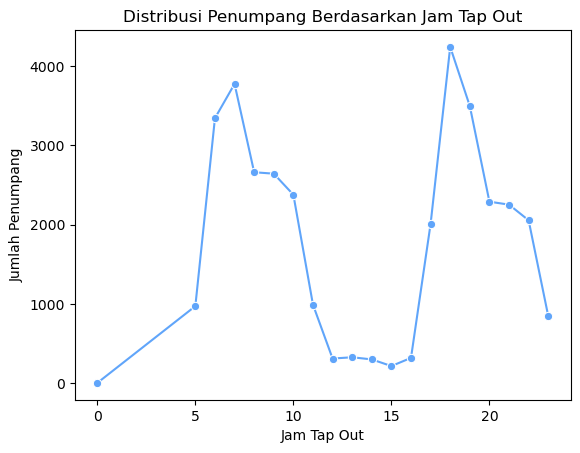

In [63]:
lineplot_handler(
    tapout_groupby_hour,
    x = "tapOutHour",
    y = "count",
    x_label = "Jam Tap Out",
    y_label = "Jumlah Penumpang",
    title = "Distribusi Penumpang Berdasarkan Jam Tap Out"
)

In [64]:
tapout_groupby_day = df["tapOutWeekday"].value_counts().reset_index()
tapout_groupby_day

tapOutWeekday  count
0              4   6441
1              1   6404
2              0   6391
3              3   6390
4              2   6383
5              6   1719
6              5   1700

In [65]:
tapout_groupby_month = df["tapOutMonth"].value_counts().reset_index()
tapout_groupby_month

tapOutMonth  count
0            4  35428

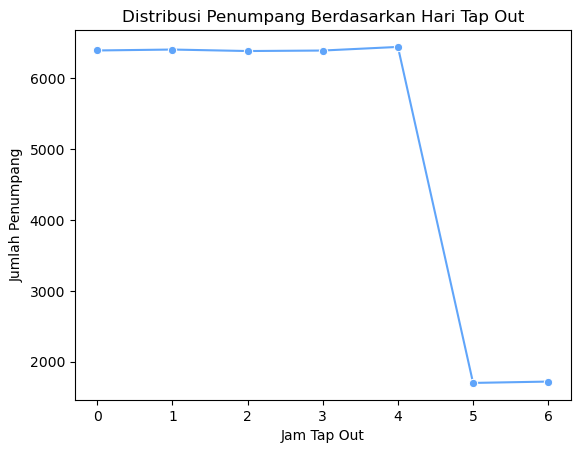

In [66]:
lineplot_handler(
    tapout_groupby_day,
    x = "tapOutWeekday",
    y = "count",
    x_label = "Jam Tap Out",
    y_label = "Jumlah Penumpang",
    title = "Distribusi Penumpang Berdasarkan Hari Tap Out"
)

4. Jumlah Penumpang Berdasarkan Halte Tap-In dan Tap-Out

In [67]:
stops_groupby_tapin = df["tapInStopsName"].value_counts().reset_index()
stops_groupby_tapin

tapInStopsName  count
0                  Penjaringan    229
1            Garuda Taman Mini    198
2                          BKN    159
3                      BNN LRT    145
4                      Pejaten    144
...                        ...    ...
2486                 Ps. Kam 2      1
2487              Jln. A Lagoa      1
2488       Jln. Simprug Golf 2      1
2489             Taman Bambu 2      1
2490  Jln. Gunung Galunggung 1      1

[2491 rows x 2 columns]

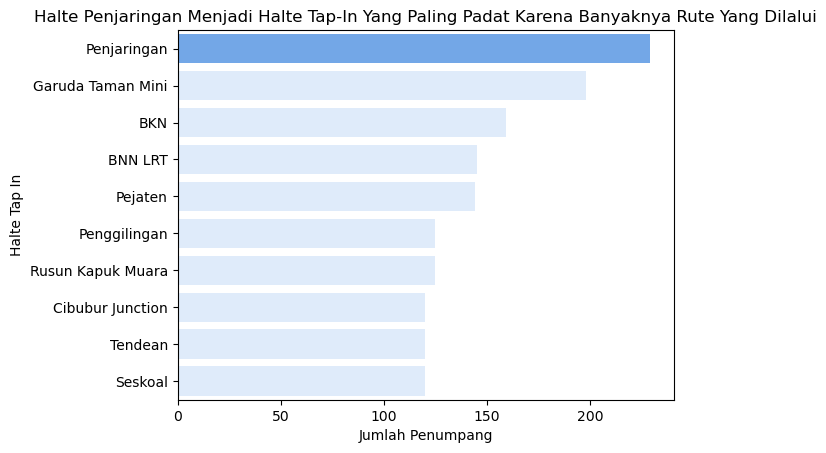

In [68]:
barplot_handler(
    stops_groupby_tapin,
    x = "count",
    y = "tapInStopsName",
    x_label = "Jumlah Penumpang",
    y_label = "Halte Tap In",
    title = "Halte Penjaringan Menjadi Halte Tap-In Yang Paling Padat Karena Banyaknya Rute Yang Dilalui",
    show_top_n = 10
)

In [69]:
stops_groupby_tapout = df["tapOutStopsName"].value_counts().reset_index()
stops_groupby_tapout

tapOutStopsName  count
0                                      BKN    302
1                              Penjaringan    264
2                              Term. Senen    188
3                                    Monas    158
4                   Term. Kampung Rambutan    158
...                                    ...    ...
2182            Jln. Kemanggisan Utama VII      1
2183                              SMPN 263      1
2184  Sbr. Panti Asuhan Anak Putra Utama 1      1
2185                      Jln. Gempol Raya      1
2186                       RSUD Cengkareng      1

[2187 rows x 2 columns]

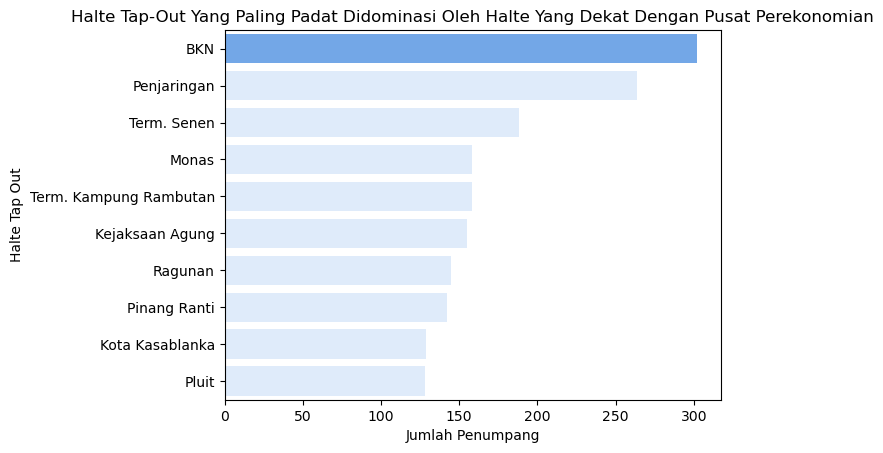

In [70]:
barplot_handler(
    stops_groupby_tapout,
    x = "count",
    y = "tapOutStopsName",
    x_label = "Jumlah Penumpang",
    y_label = "Halte Tap Out",
    title = "Halte Tap-Out Yang Paling Padat Didominasi Oleh Halte Yang Dekat Dengan Pusat Perekonomian",
    show_top_n = 10
)

In [71]:
tapin = stops_groupby_tapin.rename(columns={"tapInStopsName": "stopName"})
tapout = stops_groupby_tapout.rename(columns={"tapOutStopsName": "stopName"})


In [72]:
stops_combined = (
    pd.concat([tapin, tapout])
      .groupby("stopName")["count"]
      .sum()
      .reset_index()
      .sort_values("count", ascending=False)
)

stops_combined.head(10)

stopName  count
1726        Penjaringan    493
71                  BKN    461
77              BNN LRT    250
209    Cibubur Junction    246
3388            Tendean    246
2144  Rusun Kapuk Muara    237
1723       Penggilingan    234
1238    Kejaksaan Agung    233
343   Garuda Taman Mini    230
1694         Pecenongan    216

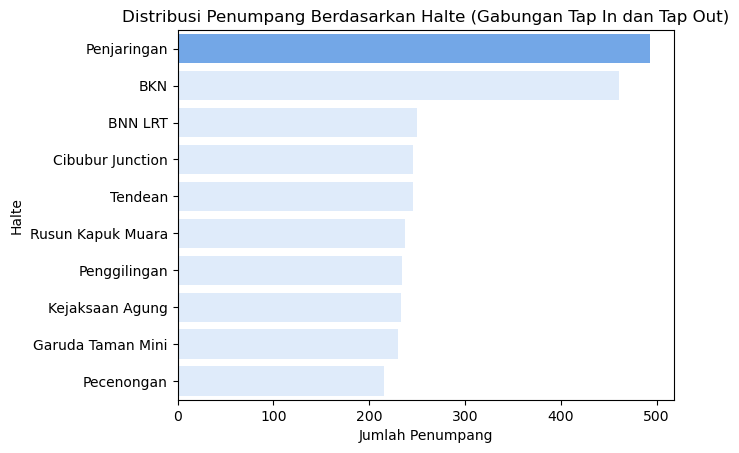

In [73]:
barplot_handler(
    stops_combined,
    x = "count",
    y = "stopName",
    x_label = "Jumlah Penumpang",
    y_label = "Halte",
    title = "Distribusi Penumpang Berdasarkan Halte (Gabungan Tap In dan Tap Out)",
    show_top_n = 10
)

In [74]:
tapin_groupby_day.columns = ["day", "count"]
tapout_groupby_day.columns = ["day", "count"]

tapin_tapout = tapin_groupby_day.merge(tapout_groupby_day, on="day", how="outer")
tapin_tapout["total"] = tapin_tapout["count_x"] + tapin_tapout["count_y"]
tapin_tapout = tapin_tapout.sort_values("day")
tapin_tapout["day"] = tapin_tapout["day"].replace({
  0: "Senin",
  1: "Selasa",
  2: "Rabu",
  3: "Kamis",
  4: "Jumat",
  5: "Sabtu",
  6: "Minggu"
})

tapin_tapout

day  count_x  count_y  total
2   Senin     6392     6391  12783
1  Selasa     6403     6404  12807
4    Rabu     6383     6383  12766
3   Kamis     6390     6390  12780
0   Jumat     6441     6441  12882
6   Sabtu     1700     1700   3400
5  Minggu     1719     1719   3438

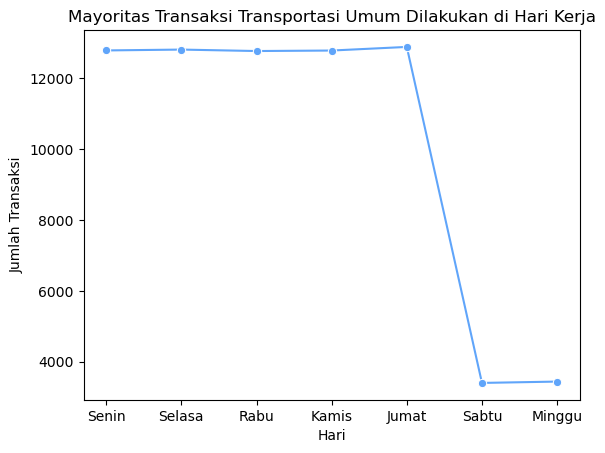

In [75]:
lineplot_handler(
    tapin_tapout,
    x = "day",
    y = "total",
    x_label = "Hari",
    y_label = "Jumlah Transaksi",
    title = "Mayoritas Transaksi Transportasi Umum Dilakukan di Hari Kerja"
)

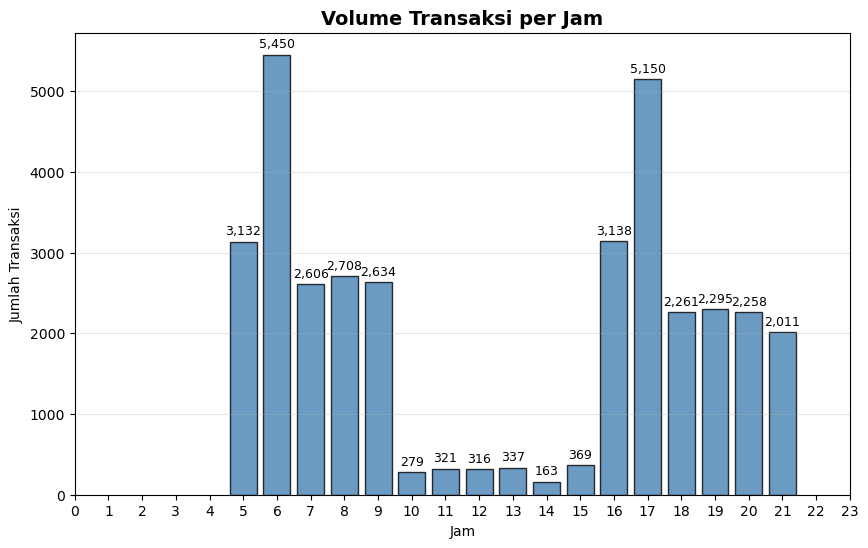

In [88]:
df["tapInTime"] = pd.to_datetime(df["tapInTime"])
df["hour"] = df["tapInTime"].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color='steelblue', alpha=0.8, edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.title("Volume Transaksi per Jam", fontsize=14, fontweight='bold')
plt.xlabel("Jam")
plt.ylabel("Jumlah Transaksi")
plt.xticks(range(0,24))
plt.grid(True, axis='y', alpha=0.3)
plt.show()

5. Durasi Perjalanan

In [76]:
df["tripDuration"] = (pd.to_datetime(df["tapOutTime"]) - pd.to_datetime(df["tapInTime"])).dt.total_seconds() / 60

In [77]:
trip_groupby_corridor = df.groupby("corridorLabel")["tripDuration"].mean().reset_index().sort_values(by = "tripDuration", ascending = False)
trip_groupby_corridor

corridorLabel  tripDuration
84                      7B - Kampung Rambutan - Blok M     84.985294
113                            D31 - Cinere - Kuningan     83.310588
29                      1B - Stasiun Palmerah - Tosari     81.580365
155                      JAK.34 - Rawamangun - Klender     80.996953
132  JAK.12 - Tanah Abang - Kebayoran Lama via Pos ...     80.070455
..                                                 ...           ...
75                     6M - Stasiun Manggarai - Blok M     62.974528
22                  12P - St. LRT Pegangsaan Dua - JIS     62.504321
200                  M11 - Pulo Gebang - Pulo Gadung 2     61.702033
89                            7P - Pondok Kelapa - BKN     61.571631
207                         M5 - Matraman Baru - Ancol     61.152222

[221 rows x 2 columns]

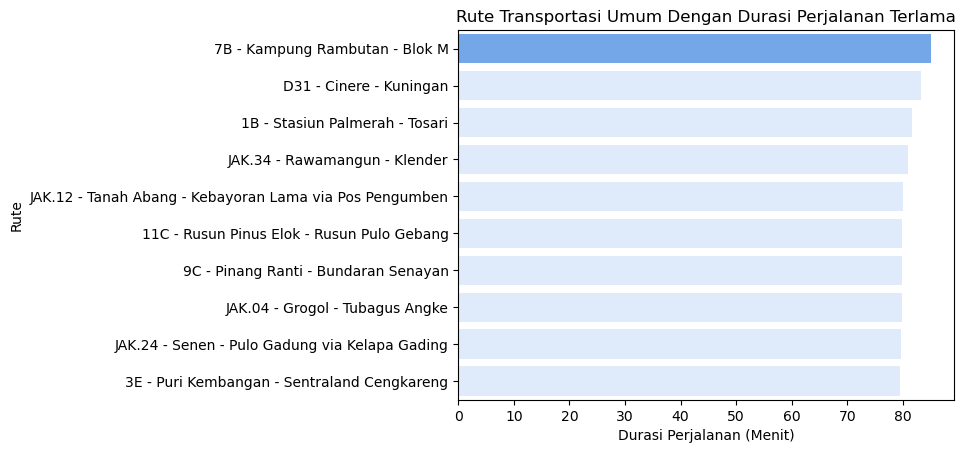

In [78]:
barplot_handler(
    trip_groupby_corridor,
    x = "tripDuration",
    y = "corridorLabel",
    x_label = "Durasi Perjalanan (Menit)",
    y_label = "Rute",
    title = "Rute Transportasi Umum Dengan Durasi Perjalanan Terlama",
    show_top_n = 10
)

In [79]:
trip_groupby_corridor = df.groupby("corridorLabel")["tripDuration"].mean().reset_index().sort_values(by = "tripDuration", ascending = True)
trip_groupby_corridor

corridorLabel  tripDuration
207                         M5 - Matraman Baru - Ancol     61.152222
89                            7P - Pondok Kelapa - BKN     61.571631
200                  M11 - Pulo Gebang - Pulo Gadung 2     61.702033
22                  12P - St. LRT Pegangsaan Dua - JIS     62.504321
75                     6M - Stasiun Manggarai - Blok M     62.974528
..                                                 ...           ...
132  JAK.12 - Tanah Abang - Kebayoran Lama via Pos ...     80.070455
155                      JAK.34 - Rawamangun - Klender     80.996953
29                      1B - Stasiun Palmerah - Tosari     81.580365
113                            D31 - Cinere - Kuningan     83.310588
84                      7B - Kampung Rambutan - Blok M     84.985294

[221 rows x 2 columns]

6. Lokasi

In [81]:
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [82]:
center_lat = df[["tapInStopsLat","tapOutStopsLat"]].mean().mean()
center_lon = df[["tapInStopsLon","tapOutStopsLon"]].mean().mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

stops_tapin = df.groupby(["tapInStopsName", "tapInStopsLat", "tapInStopsLon"]).size().reset_index(name="count_in")
stops_tapout = df.groupby(["tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon"]).size().reset_index(name="count_out")

stops_tapin = stops_tapin.rename(columns={"tapInStopsName": "stopName","tapInStopsLat":"lat","tapInStopsLon":"lon"})
stops_tapout = stops_tapout.rename(columns={"tapOutStopsName": "stopName","tapOutStopsLat":"lat","tapOutStopsLon":"lon"})

stops_combined = (
    pd.concat([stops_tapin, stops_tapout], axis=0)
    .groupby(["stopName","lat","lon"]).sum().reset_index()
)

for _, row in stops_combined.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=(row["count_in"] + row["count_out"])**0.05 / 2,  # bigger circle = more passengers
        color="blue",
        fill=True,
        fill_opacity=0.2,
        popup=f"{row['stopName']}<br>Passengers: {row['count_in'] + row['count_out']}"
    ).add_to(m)

In [83]:
m

In [84]:
m.save("distribusi_kepadatan.html")

## V. Modelling (Supervised)

In [90]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'type', 'corridorLabel', 'tapInHour', 'tapOutHour',
       'tapInWeekday', 'tapOutWeekday', 'tapInMonth', 'tapOutMonth',
       'tripDuration', 'hour'],
      dtype='object')

In [91]:
map = {}
df["tapInStopsName"] = df["tapInStopsName"].astype("category")
for index, tapInName in enumerate(df["tapInStopsName"].cat.categories):
  map[index] = tapInName

In [92]:
map

{0: '18 Office Park',
 1: 'ACC Simatupang',
 2: 'ACE Hardware',
 3: 'AKR Tower',
 4: 'ASEAN',
 5: 'ASMI',
 6: 'Adam Malik',
 7: 'Adam Malik 1',
 8: 'Ahmad Yani Bea Cukai',
 9: 'Akper Fatmawati Pondok Labu',
 10: 'Al Izhar Pondok Labu 2',
 11: 'Al Khairiyah School',
 12: 'Al Mukhlisin',
 13: 'Al Wathoniyah 1',
 14: 'Al Wathoniyah 2',
 15: 'Al-Wathoniyah',
 16: 'Allianz',
 17: 'Ambassador',
 18: 'Ampera 1',
 19: 'Ampera 2',
 20: 'Ampera 3',
 21: 'Ampera Garden',
 22: 'Ampera Yos Sudarso',
 23: 'Ananda Pulo Gadung',
 24: 'Ancol',
 25: 'Ancol Pintu 2',
 26: 'Andara Margasatwa 2',
 27: 'Andara Margasatwa 3',
 28: 'Andara Margasatwa 4',
 29: 'Aneka Apotek',
 30: 'Aneka PIK Penggilingan',
 31: 'Antena III',
 32: 'Apartemen Kedoya Elok 2',
 33: 'Apartemen Simprug Teras',
 34: 'Apotik Emilia Rawamangun',
 35: 'Apotik Rini Rawamangun',
 36: 'Ariobimo Sentral',
 37: 'Arion Mall',
 38: 'Arsip Nasional RI 1',
 39: 'Asrama Marinir Marunda 1',
 40: 'Astek',
 41: 'Aston Pluit 2',
 42: 'At Thahiriah 1'

In [93]:
dataset = df.copy()

In [94]:
dataset["tapInStopsName"] = dataset["tapInStopsName"].astype("category").cat.codes

In [95]:
dataset["isWeekday"] = (dataset["tapInWeekday"] <= 4).astype(int)

In [96]:
dataset = dataset.groupby(
    [
        "tapInStopsName",
        "tapInHour",
        "isWeekday"
    ]).size().reset_index(
        name = "passengerCount"
    ).groupby([
        "tapInStopsName",
        "tapInHour",
        "isWeekday"
    ])["passengerCount"].mean().reset_index(
        name = "averagePassengerCount"
    )

dataset["averagePassengerCount"] = dataset["averagePassengerCount"].round().astype(int)
dataset.head(5)

tapInStopsName  tapInHour  isWeekday  averagePassengerCount
0               0          5          1                      5
1               0          6          1                     14
2               1         17          0                      1
3               2         16          0                      1
4               2         18          1                      2

In [97]:
X = dataset.drop(columns = ["averagePassengerCount"])
y = dataset["averagePassengerCount"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### A. Random Forest

In [101]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
print(f"MAE: {mean_absolute_error(y_test, rf.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, rf.predict(X_test))}")

MAE: 1.9132133403917417
MSE: 12.3980802541027


##### B. CatBoost

In [105]:
cbr = cb.CatBoostRegressor()
cbr.fit(X_train, y_train)

Learning rate set to 0.056353
0:	learn: 3.8341765	total: 152ms	remaining: 2m 31s
1:	learn: 3.7564290	total: 157ms	remaining: 1m 18s
2:	learn: 3.6875496	total: 161ms	remaining: 53.5s
3:	learn: 3.6286144	total: 165ms	remaining: 41.2s
4:	learn: 3.5865620	total: 172ms	remaining: 34.2s
5:	learn: 3.5473060	total: 176ms	remaining: 29.1s
6:	learn: 3.4995709	total: 182ms	remaining: 25.8s
7:	learn: 3.4565926	total: 189ms	remaining: 23.5s
8:	learn: 3.4188167	total: 196ms	remaining: 21.6s
9:	learn: 3.3847321	total: 202ms	remaining: 20s
10:	learn: 3.3540971	total: 208ms	remaining: 18.7s
11:	learn: 3.3340374	total: 212ms	remaining: 17.4s
12:	learn: 3.3143582	total: 217ms	remaining: 16.5s
13:	learn: 3.2870478	total: 222ms	remaining: 15.6s
14:	learn: 3.2725380	total: 226ms	remaining: 14.8s
15:	learn: 3.2593529	total: 230ms	remaining: 14.1s
16:	learn: 3.2463570	total: 233ms	remaining: 13.5s
17:	learn: 3.2350737	total: 237ms	remaining: 12.9s
18:	learn: 3.2245843	total: 240ms	remaining: 12.4s
19:	learn: 

In [106]:
print(f"MAE: {mean_absolute_error(y_test, cbr.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, cbr.predict(X_test))}")

MAE: 1.7435045394884572
MSE: 9.566470015342176


##### C. Linear Regression

In [108]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
print(f"MAE: {mean_absolute_error(y_test, lr.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, lr.predict(X_test))}")

MAE: 2.116920348357779
MSE: 12.053522544220437


##### D. CatBoost (Hyperparameter Tuning)

In [110]:
cbr_estimator = cb.CatBoostRegressor(silent = True)

param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

grid_search = GridSearchCV(estimator = cbr_estimator, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000192BD087B10>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [111]:
print("Best Hyperparameters:", grid_search.best_params_)
best_cbr = grid_search.best_estimator_

Best Hyperparameters: {'border_count': 128, 'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [112]:
print(f"MAE: {mean_absolute_error(y_test, best_cbr.predict(X_test))}")
print(f"MSE: {mean_squared_error(y_test, best_cbr.predict(X_test))}")

MAE: 1.7043649642145904
MSE: 9.716847764625077


## VI. Modelling (Unsupervised)

In [210]:
df = pd.read_csv("procesed_data.csv")
df.head(5)

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... stopStartSeq            tapInTime  tapOutStops  \
0        1.0     P00142  ...            7  2023-04-03 05:21:44       P00253   
1        0.0    B01963P  ...           13  2023-04-03 05:42:44      B03307P   
2        0.0    B00499P  ...           38  2023-04-03 05:59:06      B04962P   
3        0.0    B05587P  ...           23  2023-04-03 05:44:51      B03090P   
4        0.0     P00239  ...            5  2023-04-03 06:17:35       P00098   

         tapOutStopsName tapOutStopsLat tapOutStopsLon stopEndSeq  \
0                Tegalan      -6.203101      106.85715       12.0   
1    Sampoerna Strategic      -6.217152      106.81892       21.0   
2  Simpang Kunir Kemukus      -6.133731      106.81475       39.0   
3      Raya Penggilingan      -6.183068      106.93194       29.0   
4       Kali Besar Barat      -6.135355      106.81143       15.0   

            tapOutTime  payAmount     type  
0  2023-04-03 06:00:53     3500.0      BRT  
1  2023-04-03 06:40:01     3500.0  Non-BRT  
2  2023-04-03 06:50:55     3500.0  Non-BRT  
3  2023-04-03 06:28:16     3500.0  Non-BRT  
4  2023-04-03 06:57:03     3500.0      BRT  

[5 rows x 23 columns]

In [211]:
df = df.dropna(subset=["tapInStopsLat", "tapInStopsLon", "tapInTime"])

In [212]:
df["tapInTime"] = pd.to_datetime(df["tapInTime"])
df["tapInHour"] = df["tapInTime"].dt.hour

x = df[["tapInStopsLat", "tapInStopsLon", "tapInHour"]]

In [213]:
drop_cols = [
    "transID", "payCardID", "payCardBank", "payCardName", "payCardSex", "payCardBirthDate",
    "corridorID", "corridorName", "tapInStops", "tapInStopsName",
    "stopStartSeq", "tapInTime", "tapOutStops", "tapOutStopsName",
    "tapOutStopsLat", "tapOutStopsLon", "stopEndSeq", "tapOutTime",
    "payAmount", "type"
]

x = df.drop(columns=drop_cols)

In [214]:
std = StandardScaler()
std.fit_transform(x)

array([[ 0.99904077,  0.52245555,  0.04113421, -1.31618098],
       [-1.00096015, -0.23919623, -0.14101589, -1.31618098],
       [-1.00096015,  1.41252123, -0.45017428, -1.31618098],
       ...,
       [ 0.99904077, -0.02396898, -0.41026685, -0.44163983],
       [ 0.99904077,  0.45289081, -0.52982355,  1.13253425],
       [-1.00096015, -0.37341729, -1.55118882,  1.48235071]])

In [215]:
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

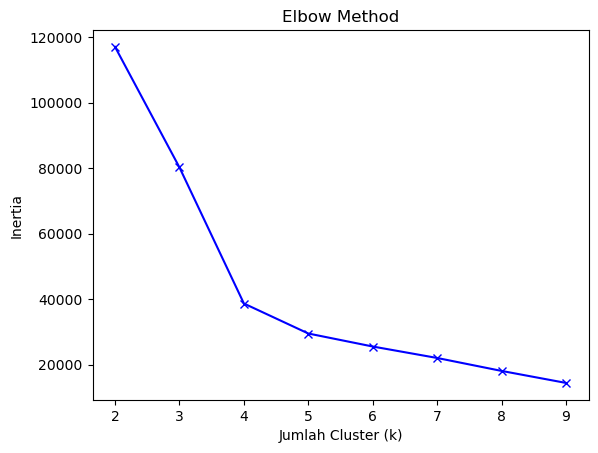

In [216]:
plt.plot(K, inertia, 'bx-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Grafik di atas menunjukkan elbow (titik belok) yang paling wajar di sekitar k = 4. Artinya menambah cluster sampai 4 memberikan pengurangan besar pada inertia (penurunan error). Setelah itu, penambahan k menghasilkan pengurangan yang jauh lebih kecil dan kurang bermakna. Namun ini bukan keputusan final, perlu verifikasi dengan metrik lain seperti silhouette.

k        inertia  silhouette  calinski_harabasz  davies_bouldin
0  2  117029.697563    0.794102      317881.892713        0.290194
1  3   71487.227441    0.677510      271474.464994        0.481707
2  4   38701.139622    0.587050      344298.494808        0.597994
3  5   28781.042731    0.593006      350269.653854        0.563752
4  6   23692.394492    0.532404      341912.382386        0.686731
5  7   19256.376281    0.499245      351914.601997        0.797649
6  8   16707.144224    0.487614      348428.751926        0.855311
7  9   14459.670130    0.500517      352940.267172        0.824201

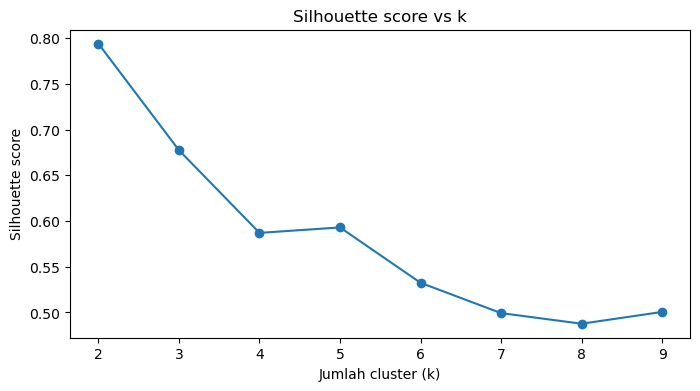

In [217]:
ks = range(2, 10)
inertias = []
sil_scores = []
ch_scores = []
db_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(x)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(x, labels))
    ch_scores.append(calinski_harabasz_score(x, labels))
    db_scores.append(davies_bouldin_score(x, labels))

df_summary = pd.DataFrame({
    'k': list(ks),
    'inertia': inertias,
    'silhouette': sil_scores,
    'calinski_harabasz': ch_scores,
    'davies_bouldin': db_scores
})
display(df_summary)

fig, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(ks, sil_scores, marker='o')
ax2.set_xlabel('Jumlah cluster (k)')
ax2.set_ylabel('Silhouette score')
ax2.set_title('Silhouette score vs k')

plt.show()

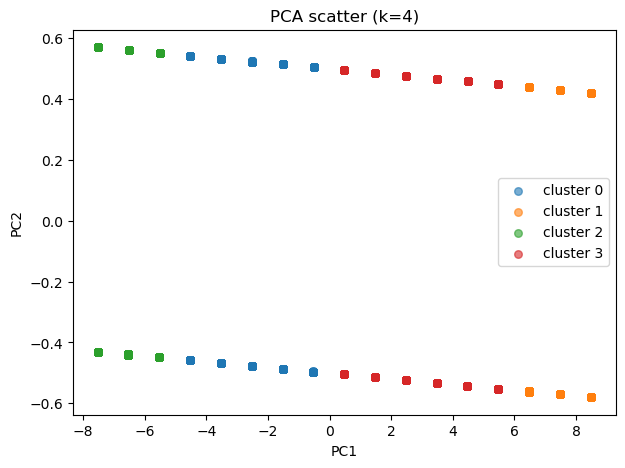

In [226]:
k_choice = 4
km = KMeans(n_clusters=k_choice, n_init=10, random_state=42).fit(x)
labels = km.labels_
pca = PCA(n_components=2)
Xp = pca.fit_transform(x)

plt.figure(figsize=(7,5))
for lab in np.unique(labels):
    plt.scatter(Xp[labels==lab,0], Xp[labels==lab,1], label=f'cluster {lab}', alpha=0.6, s=30)
plt.legend()
plt.title(f'PCA scatter (k={k_choice})')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

Jadi, untuk analisis interpretatif sebaiknya pilih k=4, karena:

- Memberikan segmentasi yang masih jelas di PCA.
- Tidak terlalu sederhana seperti k=2, dan tidak terlalu rumit seperti k=8–9.

In [219]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(x)

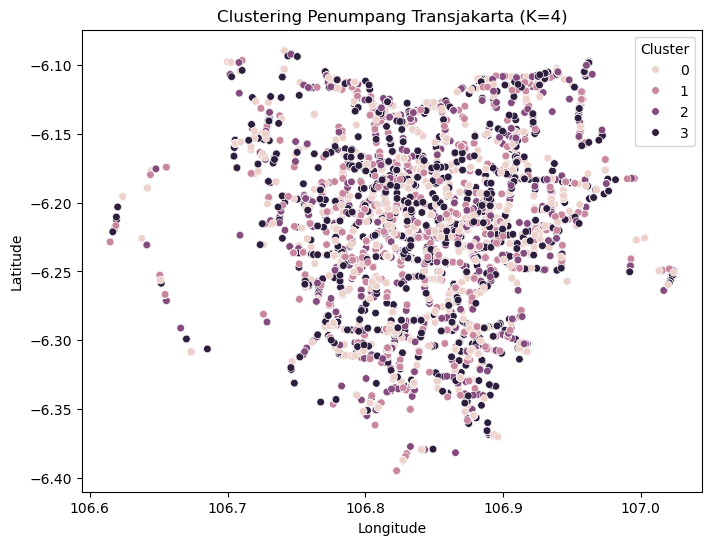

In [220]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["tapInStopsLon"],
    y=df["tapInStopsLat"],
    hue=df["cluster"],
    s=30
)
plt.title("Clustering Penumpang Transjakarta0 (K=4)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

In [221]:
url = "https://raw.githubusercontent.com/ardian28/GeoJson-Indonesia-38-Provinsi/main/Provinsi/38%20Provinsi%20Indonesia%20-%20Provinsi.json"
r = requests.get(url)

with open("provinsi_indonesia.geojson", "wb") as f:
    f.write(r.content)

provinsi = gpd.read_file("provinsi_indonesia.geojson").to_crs("EPSG:4326")

In [222]:
gdf_points = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["tapInStopsLon"], df["tapInStopsLat"]),
    crs="EPSG:4326"
)

In [223]:
joined = gpd.sjoin(gdf_points, provinsi, how="left", predicate="within")

In [224]:
counts = joined.groupby("PROVINSI").size().reset_index(name="jumlah_titik")

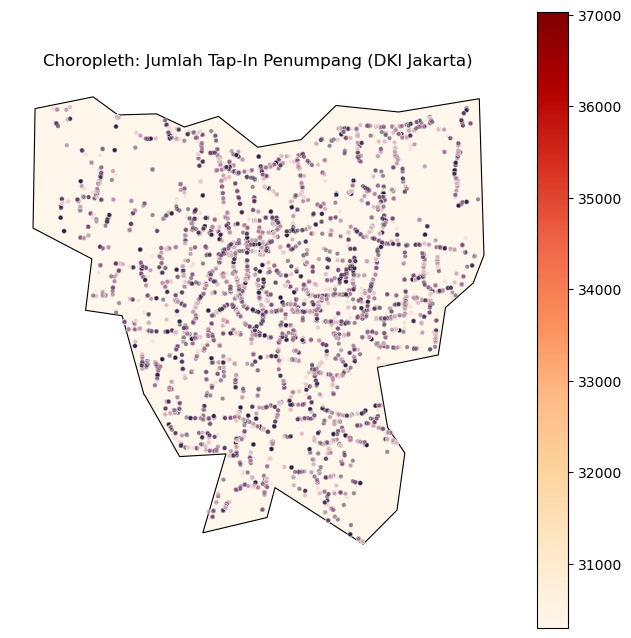

In [225]:
jakarta = provinsi[provinsi["PROVINSI"].str.contains("JAKARTA", case=False, na=False)]
counts_jkt = counts[counts["PROVINSI"].str.contains("JAKARTA", case=False, na=False)]

jakarta_counts = jakarta.merge(counts_jkt, on="PROVINSI", how="left")
jakarta_counts["jumlah_titik"] = jakarta_counts["jumlah_titik"].fillna(0)

fig, ax = plt.subplots(figsize=(8,8))

jakarta_counts.plot(
    column="jumlah_titik",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="black",
    ax=ax,
    legend=True,
    missing_kwds={"color": "lightgrey"}
)

ax.set_title("Choropleth: Jumlah Tap-In Penumpang (DKI Jakarta)")
ax.set_axis_off()

sns.scatterplot(
    x=joined.loc[joined["PROVINSI"].str.contains("JAKARTA", case=False, na=False), "tapInStopsLon"],
    y=joined.loc[joined["PROVINSI"].str.contains("JAKARTA", case=False, na=False), "tapInStopsLat"],
    hue=joined.loc[joined["PROVINSI"].str.contains("JAKARTA", case=False, na=False), "cluster"],
    s=10,
    ax=ax,
    alpha=0.5,
    legend=False
)

plt.show()

## VII. Modelling (Sentiment Analysis)

In [228]:
df = pd.read_csv('dataset_sentiment.csv')
df.head()

title                                                url  stars  \
0  Makasar  https://www.google.com/maps/search/?api=1&quer...      1   
1  Makasar  https://www.google.com/maps/search/?api=1&quer...      1   
2  Makasar  https://www.google.com/maps/search/?api=1&quer...      1   
3  Makasar  https://www.google.com/maps/search/?api=1&quer...      1   
4  Makasar  https://www.google.com/maps/search/?api=1&quer...      1   

                name                                          reviewUrl  \
0  tingkerbel cantik  https://www.google.com/maps/reviews/data=!4m8!...   
1      Indah Nuraini  https://www.google.com/maps/reviews/data=!4m8!...   
2     nasya karamina  https://www.google.com/maps/reviews/data=!4m8!...   
3           muklasin  https://www.google.com/maps/reviews/data=!4m8!...   
4             Gb Jkt  https://www.google.com/maps/reviews/data=!4m8!...   

                                                text  
0  PETUGAS LAKI LAKI yang bertugas jumat malam (1...  
1  Naik dari pgc 1 anak umur 3 tahun masuk boleu ...  
2  ATTITUDE PETUGAS LAKI LAKI TOLONG DIPERBAIKI Y...  
3  SELASA 16 JULI PETUGAS MALAM HARI TAK ADA YG B...  
4                                      Kurang akurat

In [229]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nadya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nadya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [230]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}0-9\\n\\r\\t]', ' ', text)
    words = text.split()
    cleaned_words = [w for w in words if w not in stop_words]
    return ' '.join(cleaned_words)

df['text'] = df['text'].apply(clean_text)

In [231]:
df['text'].head()

0    petugas laki laki bertugas jumat malam sopan s...
1    pgc anak umur masuk boleu bayar pas turun halt...
2    attitude petugas laki laki tolong diperbaiki y...
3    selasa juli petugas malam yg berjaga kemana ya...
4                                               akurat
Name: text, dtype: object

In [232]:
df = df.dropna(subset=['text'])

custom_stopwords = {"nan", "yg", "nya", "ga", "aja", "the", "dah"}

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and w not in custom_stopwords]
    return " ".join(tokens)

df['text'] = df['text'].astype(str).apply(clean_text)

[('halte', 181), ('bus', 75), ('busway', 58), ('penumpang', 51), ('jam', 45), ('petugas', 44), ('jalan', 40), ('transjakarta', 35), ('arah', 27), ('gak', 27), ('transit', 27), ('tolong', 26), ('nyaman', 26), ('rute', 22), ('jurusan', 22), ('sempit', 22), ('ya', 20), ('koridor', 20), ('ramai', 20), ('bagus', 19)]


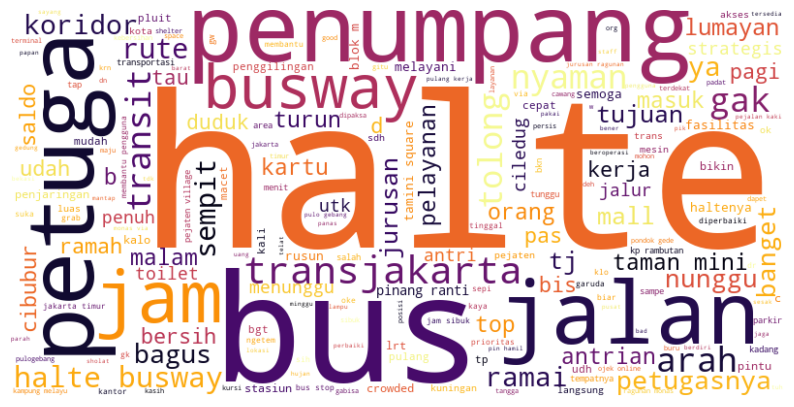

In [233]:
all_words = " ".join(df['text']).split()
word_freq = Counter(all_words)

print(word_freq.most_common(20))
plt.figure(figsize=(10,6))
wc = WordCloud(width=800, height=400, background_color="white", colormap="inferno").generate(" ".join(df['text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [234]:
neg_words = [
    "lama","macet","rusak","penuh","antri","mengecewakan",
    "kotor","marah","berdesakan","jelek","buruk","bising",
    "ribet","parah","muak","panas","sesak","jorok"
]

neg_freq = {w:0 for w in neg_words}
for w in " ".join(df['text']).split():
    if w in neg_freq:
        neg_freq[w] += 1

sorted_neg = sorted(neg_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_neg)

[('penuh', 13), ('antri', 13), ('macet', 10), ('parah', 5), ('panas', 5), ('sesak', 5), ('rusak', 4), ('mengecewakan', 2), ('berdesakan', 2), ('buruk', 2), ('jorok', 2), ('kotor', 1), ('marah', 1), ('jelek', 1), ('lama', 0), ('bising', 0), ('ribet', 0), ('muak', 0)]


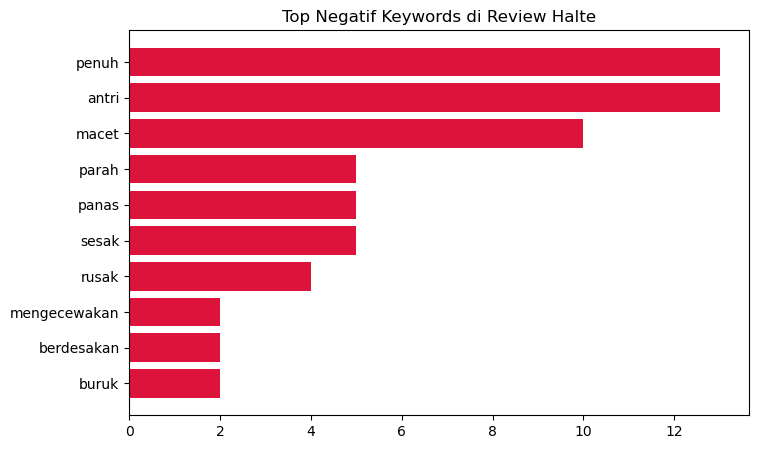

In [235]:
neg_words_plot = dict(sorted_neg[:10])  # top 10 kata negatif
plt.figure(figsize=(8,5))
plt.barh(list(neg_words_plot.keys()), list(neg_words_plot.values()), color="crimson")
plt.gca().invert_yaxis()
plt.title("Top Negatif Keywords di Review Halte")
plt.show()

In [236]:
def sentiment_score(text):
    score = 0
    for w in text.split():
        if w in neg_words:
            score -= 1
        elif w in ["bagus","bersih","nyaman","baik","rapi","cepat"]:
            score += 1
    return score

df['sentiment_score'] = df['text'].apply(sentiment_score)

sentiment_per_halte = df.groupby('title')['sentiment_score'].mean().sort_values()
print(sentiment_per_halte)

title
Halte trans jakarta        -0.225000
Halte Busway Penjaringan   -0.087500
Halte Tendean              -0.037500
Penggilingan                0.041096
Pejaten                     0.062500
Stasiun LRT Cawang          0.062500
Halte Transjakarta Bkn      0.064516
Seskoal                     0.111111
Makasar                     0.175000
Rusun Kapuk Muara           0.200000
Name: sentiment_score, dtype: float64


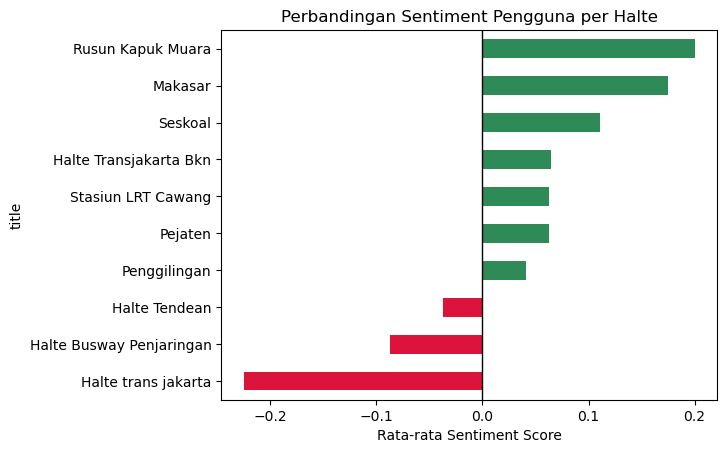

In [237]:
sentiment_per_halte.plot(kind="barh", color=["crimson" if v < 0 else "seagreen" for v in sentiment_per_halte])
plt.xlabel("Rata-rata Sentiment Score")
plt.title("Perbandingan Sentiment Pengguna per Halte")
plt.axvline(0, color='black', linewidth=1)
plt.show()